# Librerias

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point, LineString, Polygon
from shapely.wkt import loads
import fiona
import matplotlib.pyplot as plt


# Paths, carga y lectura  

In [3]:
#Pon el path a tu shapefile de la carpeta de Estados que descargaste. Ejemplo:
file_pathAShapefile_Estados = 'Estados/conjunto_de_datos/00ent.shp'
#Pon el path a tu shapefile de la carpeta de servicios_de_salud_shp que descargaste. Ejemplo:
file_pathAShapefile_ServicioSalud = 'servicios_de_salud_shp/conjunto_de_datos/denue_inegi_62_.shp'

In [4]:
#Leer shapefiles que usaremos
gdf_mexico = gpd.read_file(file_pathAShapefile_Estados)
gdf_salud = gpd.read_file(file_pathAShapefile_ServicioSalud)


# Introducción

In [ ]:
# Notar que shapefile consiste de muchos archivos y para que funcione correctamente deben estar junto con el .shp
#Cuando usas GeoPandas para leer un shapefile con gpd.read_file(), 
#automáticamente cargará todos los archivos necesarios 
#(por ejemplo, .shp, .shx, y .dbf) si están en la misma carpeta y 
#tienen el mismo nombre base (por ejemplo, mexico.shp, mexico.shx, mexico.dbf).

## Geopandas

In [5]:
# Informacion basica de estados
print("Basic Shapefile Structure:")
print(type(gdf_mexico))

Basic Shapefile Structure:
<class 'geopandas.geodataframe.GeoDataFrame'>


In [6]:
print("\nShape of the dataset:", gdf_mexico.shape) #obviamente hay 32 estados



Shape of the dataset: (32, 4)


In [7]:
print("\nColumns available:", gdf_mexico.columns.tolist())



Columns available: ['CVEGEO', 'CVE_ENT', 'NOMGEO', 'geometry']


In [9]:
print("\nData types of columns:\n", gdf_mexico.dtypes)



Data types of columns:
 CVEGEO        object
CVE_ENT       object
NOMGEO        object
geometry    geometry
dtype: object


In [10]:
print("\nCoordinate Reference System (CRS):", gdf_mexico.crs) #nos da la configuracion del CRS



Coordinate Reference System (CRS): PROJCS["MEXICO_ITRF_2008_LCC",GEOGCS["GCS_MEXICO_ITRF_2008",DATUM["International_Terrestrial_Reference_Frame_2008",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1061"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",12],PARAMETER["central_meridian",-102],PARAMETER["standard_parallel_1",17.5],PARAMETER["standard_parallel_2",29.5],PARAMETER["false_easting",2500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [11]:
gdf_mexico #ver la tabla
# igual se puede usar gdf_mexico.info

,CVEGEO,CVE_ENT,NOMGEO,geometry
0,01,01,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248..."
1,02,02,Baja California,"MULTIPOLYGON (((1313480.513 1831458.607, 13135..."
2,03,03,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946..."
3,04,04,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491..."
4,05,05,Coahuila de Zaragoza,"POLYGON ((2469954.193 1978522.993, 2469982.807..."
5,06,06,Colima,"MULTIPOLYGON (((1157633.318 768573.524, 115772..."
6,07,07,Chiapas,"POLYGON ((3560747.319 695090.732, 3561146.749 ..."
7,08,08,Chihuahua,"POLYGON ((1961978.327 2201082.365, 1961978.967..."
8,09,09,Ciudad de México,"POLYGON ((2802175.660 843326.718, 2801806.564 ..."
9,10,10,Durango,"POLYGON ((2107050.444 1641943.398, 2109767.526..."


In [12]:
#Acceder a columna igual como en pandas, se puede filtrar y sumar columnas como en pandas
gdf_mexico["NOMGEO"]

0                      Aguascalientes
1                     Baja California
2                 Baja California Sur
3                            Campeche
4                Coahuila de Zaragoza
5                              Colima
6                             Chiapas
7                           Chihuahua
8                    Ciudad de México
9                             Durango
10                         Guanajuato
11                           Guerrero
12                            Hidalgo
13                            Jalisco
14                             México
15                Michoacán de Ocampo
16                            Morelos
17                            Nayarit
18                         Nuevo León
19                             Oaxaca
20                             Puebla
21                          Querétaro
22                       Quintana Roo
23                    San Luis Potosí
24                            Sinaloa
25                             Sonora
26          

<Axes: >

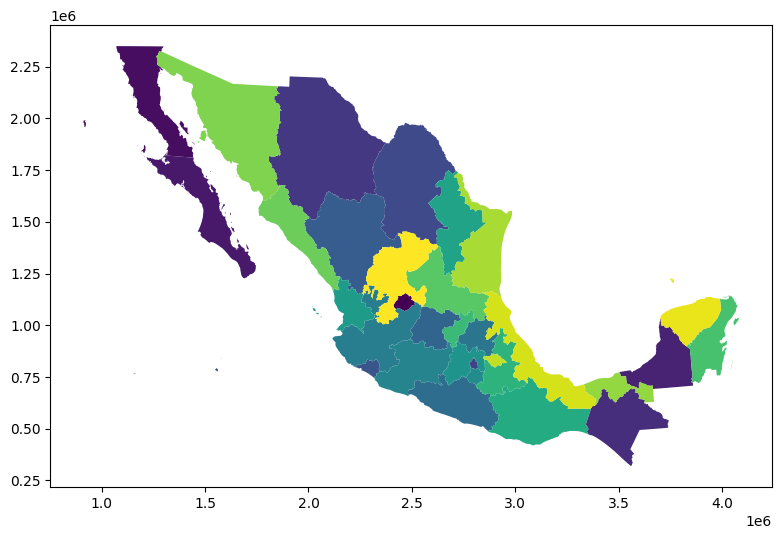

In [13]:
#Graficar el pais
gdf_mexico.plot(column="NOMGEO", cmap="viridis", legend=False, figsize=(10, 6))

<Axes: >

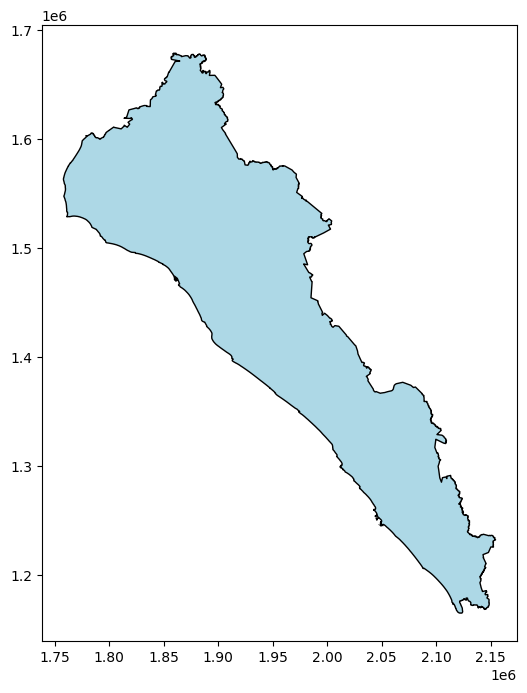

In [14]:
#Graficar un estado 
gdf_sinaloa = gdf_mexico[gdf_mexico['NOMGEO'] == 'Sinaloa']
fig, ax = plt.subplots(figsize=(8, 8))
gdf_sinaloa.plot(ax=ax, color='lightblue', edgecolor='black')

## Operaciones geoespaciales

In [15]:
#Union, interseccion, diferencia, buffers(se veran en parte salud)


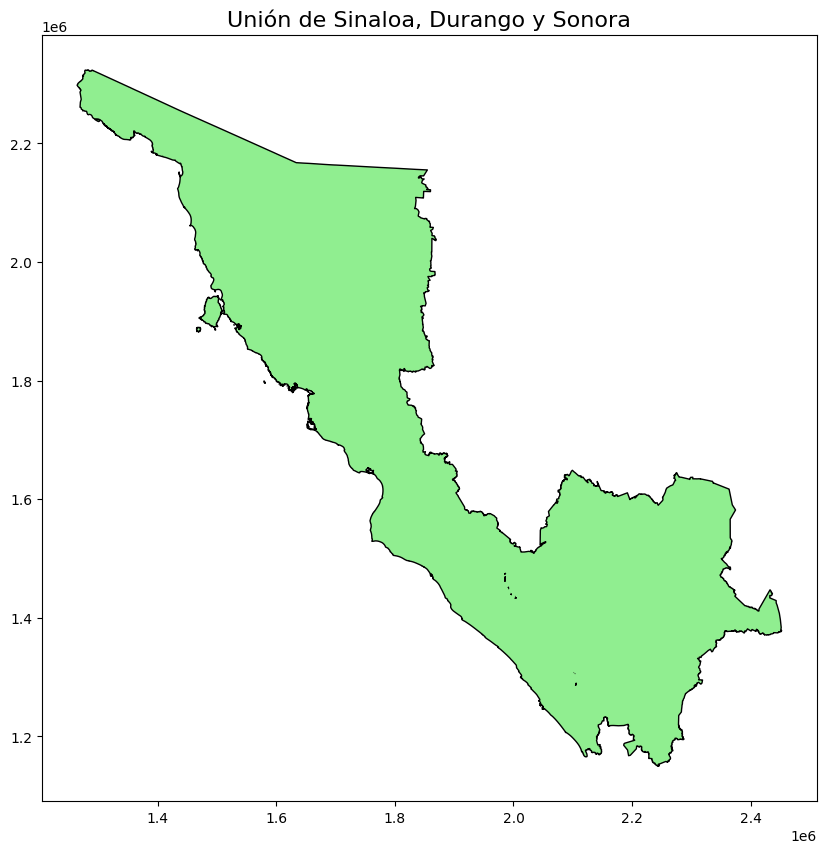

In [16]:
# Filtrar los estados de Sinaloa, Durango y Sonora
estados = ['Sinaloa', 'Durango', 'Sonora']
gdf_estados = gdf_mexico[gdf_mexico['NOMGEO'].isin(estados)]

# Unir las geometrías de los tres estados
gdf_union = gdf_estados.geometry.unary_union

# Graficar la unión de las geometrías
fig, ax = plt.subplots(figsize=(10, 10))
gpd.GeoSeries(gdf_union).plot(ax=ax, color='lightgreen', edgecolor='black')
ax.set_title('Unión de Sinaloa, Durango y Sonora', fontsize=16)
plt.show()

## Geometry

In [17]:
# Contar tipos de geometrías
print(gdf_mexico.geometry.geom_type.value_counts())

#Notar tambien hay puntos.


Polygon         19
MultiPolygon    13
Name: count, dtype: int64


In [18]:
# Coordenadas del primer polígono(Estado Aguascalientes)
coords = gdf_mexico.geometry.iloc[0].exterior.coords
#print(list(coords)) es largo 
print("Primera coordenada:", coords[0]) 
print("Segunda coordenada:", coords[1])  
print("Tercera coordenada:", coords[2])  
print("Última coordenada:", coords[-1])  



#Lista de coordenadas:
#Cada par de números, como 2470517.824299999 1155028.5882999091, corresponde a las coordenadas X (longitud) e Y (latitud) de un punto en el polígono.
#Los puntos están conectados en el orden en el que aparecen para formar los bordes del polígono.
#El último punto del polígono debe coincidir con el primero para cerrarlo.

Primera coordenada: (2470517.824299999, 1155028.5882999091)
Segunda coordenada: (2470552.248400002, 1154982.9737999097)
Tercera coordenada: (2470607.431999997, 1154988.225599908)
Última coordenada: (2470517.824299999, 1155028.5882999091)


In [19]:
# Obtener los límites (bounding box)
print(gdf_mexico.geometry.iloc[0].bounds)


(2410091.7770999963, 1067540.0003999046, 2516929.1625000015, 1159778.330499908)


In [20]:
# Funciones de geometry
# notar que area el CRS nos indica que area esta en metros cuadrados por eso sidividmos entre 1,000,000 y creamos nueva columna.
# UNIT["metre",1,AUTHORITY["EPSG","9001"]]
gdf_mexico["area_km2"] = gdf_mexico.geometry.area / 1_000_000
gdf_mexico["perimeter_km"] = gdf_mexico.geometry.length / 1000
gdf_mexico["centroide"] = gdf_mexico.geometry.centroid 

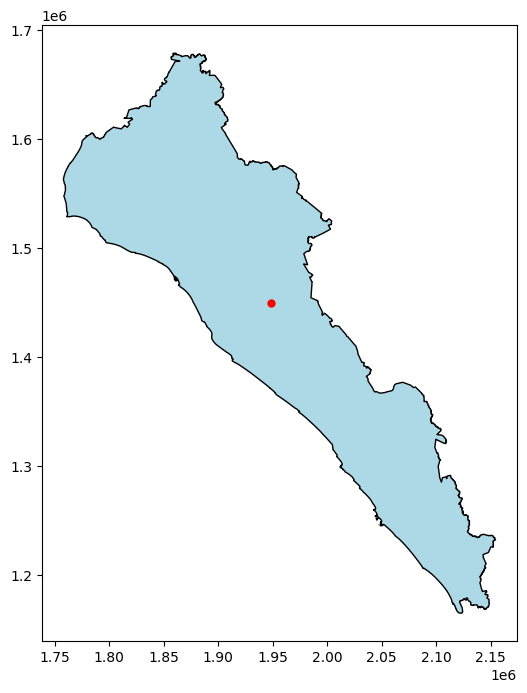

In [21]:
#Graficar sinaloa con el centroide
gdf_sinaloa = gdf_mexico[gdf_mexico['NOMGEO'] == 'Sinaloa']
centroide = gdf_sinaloa["centroide"]
# Graficar el estado
fig, ax = plt.subplots(figsize=(8, 8))
gdf_sinaloa.plot(ax=ax, color='lightblue', edgecolor='black')

# Graficar el centroide
ax.plot(centroide.x, centroide.y, marker='o', color='red', markersize=5, label="Centroide")

# Mostrar el gráfico
plt.show()

In [22]:
# Obtener distancia entre dos puntos 

gdf_nuevo_leon = gdf_mexico[gdf_mexico['NOMGEO'] == 'Nuevo León']
gdf_yucatan = gdf_mexico[gdf_mexico['NOMGEO'] == 'Yucatán']

# Obtener los centroides de ambos estados
centroide_nl = gdf_nuevo_leon.geometry.centroid.iloc[0]  # El centroide de Nuevo León
centroide_yucatan = gdf_yucatan.geometry.centroid.iloc[0]  # El centroide de Yucatán

# Calcular la distancia entre los centroides utilizando el método .distance() de Shapely
distancia_km = centroide_nl.distance(centroide_yucatan) / 1000  # Convertimos de metros a kilómetros

print(f"La distancia entre los centroides de Nuevo León y Yucatán es de {distancia_km:.2f} kilómetros.")


La distancia entre los centroides de Nuevo León y Yucatán es de 1242.64 kilómetros.


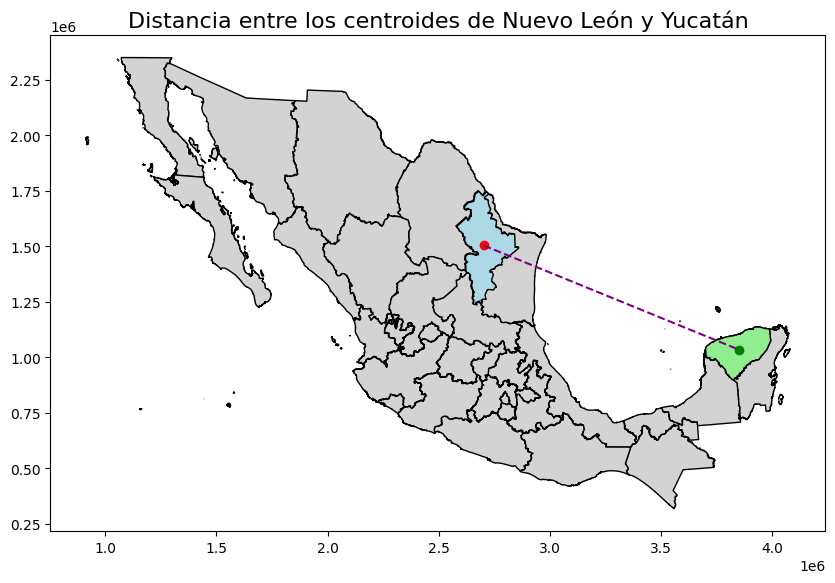

In [24]:
#Grafica de distancia entre centroides

# Crear la figura y el eje para graficar
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar los límites de los estados (en gris claro)
gdf_mexico.plot(ax=ax, color='lightgray', edgecolor='black')

# Graficar los estados de Nuevo León y Yucatán en un color diferente (azul y verde)
gdf_nuevo_leon.plot(ax=ax, color='lightblue', edgecolor='black', label='Nuevo León')
gdf_yucatan.plot(ax=ax, color='lightgreen', edgecolor='black', label='Yucatán')

# Graficar los centroides de Nuevo León y Yucatán como puntos rojos
ax.plot(centroide_nl.x, centroide_nl.y, 'ro', label='Centroide Nuevo León')
ax.plot(centroide_yucatan.x, centroide_yucatan.y, 'go', label='Centroide Yucatán')

dist = int(distancia_km)
# Dibujar una línea entre los dos centroides
ax.plot([centroide_nl.x, centroide_yucatan.x], 
        [centroide_nl.y, centroide_yucatan.y], 
        color='purple', linestyle='--', label=f'Distancia: {dist:.2f} km')

# Añadir título y leyenda
ax.set_title('Distancia entre los centroides de Nuevo León y Yucatán', fontsize=16)
# Mostrar el gráfico
plt.show()

## Estadística básica

In [25]:
print("\n Basic Statistics:")


total_area = gdf_mexico.area_km2.sum() 
mean_area = gdf_mexico.area_km2.mean()

print(f"\nTotal area Mexico: {total_area:,.2f} km^2")
print(f"Area media por estado: {mean_area:,.2f} km^2")


 Basic Statistics:

Total area Mexico: 1,954,679.73 km^2
Area media por estado: 61,083.74 km^2


In [26]:
#De cada estado
print(gdf_mexico[["NOMGEO", "area_km2", "perimeter_km", "centroide"]].head())


                 NOMGEO       area_km2  perimeter_km  \
0        Aguascalientes    5558.673843    423.005983   
1       Baja California   73412.197393   3114.717966   
2   Baja California Sur   72773.977048   4086.628211   
3              Campeche   57269.828738   1566.405110   
4  Coahuila de Zaragoza  150671.222987   2414.885296   

                         centroide  
0  POINT (2462808.983 1109866.277)  
1  POINT (1243763.617 2110260.341)  
2  POINT (1501178.182 1572567.869)  
3   POINT (3722580.440 810059.531)  
4  POINT (2495627.136 1691945.042)  


# Funciones

## Estados vecinos

In [27]:
vecinos_dict = {}
# Iterar sobre cada estado en el dataframe
for index, row in gdf_mexico.iterrows():
    # Obtener la geometría del estado actual
    estado_geom = row['geometry']
    
    # Encontrar los estados que intersectan con el estado actual (incluye fronteras y superposiciones)
    gdf_vecinos = gdf_mexico[gdf_mexico.geometry.intersects(estado_geom)]
    
    # Eliminar el estado mismo de la lista de vecinos (si se incluye)
    gdf_vecinos = gdf_vecinos[gdf_vecinos['NOMGEO'] != row['NOMGEO']]
    
    # Obtener los nombres de los vecinos
    vecinos_nombres = gdf_vecinos['NOMGEO'].tolist()
    
    # Almacenar en el diccionario
    vecinos_dict[row['NOMGEO']] = vecinos_nombres

# Imprimir los vecinos de cada estado
for estado, vecinos in vecinos_dict.items():
    print(f"Estado: {estado}")
    print(f"Vecinos: {', '.join(vecinos)}\n")

Estado: Aguascalientes
Vecinos: Jalisco, Zacatecas

Estado: Baja California
Vecinos: Baja California Sur, Sonora

Estado: Baja California Sur
Vecinos: Baja California

Estado: Campeche
Vecinos: Quintana Roo, Tabasco, Yucatán

Estado: Coahuila de Zaragoza
Vecinos: Chihuahua, Durango, Nuevo León, Zacatecas

Estado: Colima
Vecinos: Jalisco, Michoacán de Ocampo

Estado: Chiapas
Vecinos: Oaxaca, Tabasco, Veracruz de Ignacio de la Llave

Estado: Chihuahua
Vecinos: Coahuila de Zaragoza, Durango, Sinaloa, Sonora

Estado: Ciudad de México
Vecinos: México, Morelos

Estado: Durango
Vecinos: Coahuila de Zaragoza, Chihuahua, Nayarit, Sinaloa, Zacatecas

Estado: Guanajuato
Vecinos: Jalisco, Michoacán de Ocampo, Querétaro, San Luis Potosí, Zacatecas

Estado: Guerrero
Vecinos: México, Michoacán de Ocampo, Morelos, Oaxaca, Puebla

Estado: Hidalgo
Vecinos: México, Puebla, Querétaro, San Luis Potosí, Tlaxcala, Veracruz de Ignacio de la Llave

Estado: Jalisco
Vecinos: Aguascalientes, Colima, Guanajuato, M

## Graficar estados vecinos a un estado

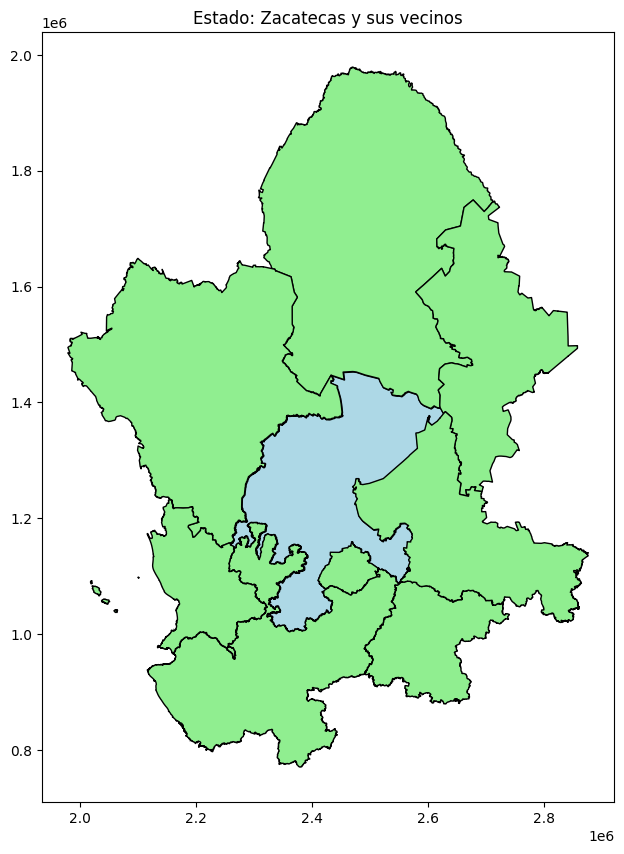

In [28]:
def plot_estado_y_vecinos(estado, gdf, vecinos_dict):
    # Obtener la geometría del estado de interés
    estado_geom = gdf[gdf['NOMGEO'] == estado].geometry.iloc[0]
    
    # Obtener los vecinos del estado desde el diccionario
    vecinos = vecinos_dict.get(estado, [])
    
    # Filtrar los estados vecinos
    gdf_vecinos = gdf[gdf['NOMGEO'].isin(vecinos)]
    
    # Crear una figura y un eje para el gráfico
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Graficar el estado de interés con un color especial (por ejemplo, en azul)
    gdf[gdf['NOMGEO'] == estado].plot(ax=ax, color='lightblue', edgecolor='black', label=f'{estado}')
    
    # Graficar los estados vecinos con otro color (por ejemplo, en verde)
    gdf_vecinos.plot(ax=ax, color='lightgreen', edgecolor='black', label='Vecinos')
    
    # Personalizar el gráfico
    ax.set_title(f"Estado: {estado} y sus vecinos")
    
    # Mostrar el gráfico
    plt.show()

plot_estado_y_vecinos('Zacatecas', gdf_mexico, vecinos_dict)

# Shapefiles "farmacias" en México

Este es un shapefile con datos de farmacias en mexico

## Análisis previo shapefile farmacia

In [30]:
# Informacion basica de estados
print("Basic Shapefile Structure:")
print(type(gdf_salud))

Basic Shapefile Structure:
<class 'geopandas.geodataframe.GeoDataFrame'>


In [31]:
print("\nShape of the dataset:", gdf_salud.shape) 


Shape of the dataset: (235222, 43)


In [32]:
print("\nColumns available:", gdf_salud.columns.tolist())



Columns available: ['id', 'clee', 'nom_estab', 'raz_social', 'codigo_act', 'nombre_act', 'per_ocu', 'tipo_vial', 'nom_vial', 'tipo_v_e_1', 'nom_v_e_1', 'tipo_v_e_2', 'nom_v_e_2', 'tipo_v_e_3', 'nom_v_e_3', 'numero_ext', 'letra_ext', 'edificio', 'edificio_e', 'numero_int', 'letra_int', 'tipo_asent', 'nomb_asent', 'tipoCenCom', 'nom_CenCom', 'num_local', 'cod_postal', 'cve_ent', 'entidad', 'cve_mun', 'municipio', 'cve_loc', 'localidad', 'ageb', 'manzana', 'telefono', 'correoelec', 'www', 'tipoUniEco', 'latitud', 'longitud', 'fecha_alta', 'geometry']


In [33]:
print("\nData types of columns:\n", gdf_salud.dtypes)


Data types of columns:
 id               int64
clee            object
nom_estab       object
raz_social      object
codigo_act      object
nombre_act      object
per_ocu         object
tipo_vial       object
nom_vial        object
tipo_v_e_1      object
nom_v_e_1       object
tipo_v_e_2      object
nom_v_e_2       object
tipo_v_e_3      object
nom_v_e_3       object
numero_ext      object
letra_ext       object
edificio        object
edificio_e      object
numero_int      object
letra_int       object
tipo_asent      object
nomb_asent      object
tipoCenCom      object
nom_CenCom      object
num_local       object
cod_postal      object
cve_ent         object
entidad         object
cve_mun         object
municipio       object
cve_loc         object
localidad       object
ageb            object
manzana         object
telefono        object
correoelec      object
www             object
tipoUniEco      object
latitud        float64
longitud       float64
fecha_alta      object
geometry 

In [34]:
gdf_salud

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry
0,101363,02001621211002581000000000U5,DENTISTA MILITAR,None,621211,Consultorios dentales del sector privado,0 a 5 personas,CALLE,RIO BLANCO,CALLE,...,7964,044,6462130920,None,None,Fijo,31.845642,-116.601959,2014-12,POINT (-116.60196 31.84564)
1,69228,02004621211002811000000000U0,DENTISTA LOMELI,None,621211,Consultorios dentales del sector privado,0 a 5 personas,AVENIDA,BUCARELI,CALLE,...,0598,007,6646376106,None,None,Fijo,32.489294,-117.041228,2010-07,POINT (-117.04123 32.48929)
2,7049128,02004621211016431000000000U1,DENTISTA OASIS,None,621211,Consultorios dentales del sector privado,0 a 5 personas,BOULEVARD,REAL DE BAJA CALIFORNIA,BOULEVARD,...,728A,006,6643444741,None,None,Fijo,32.486737,-116.848466,2019-11,POINT (-116.84847 32.48674)
3,6914702,02002621211011581000000000U2,DENTISTA NIÑOS Y ADULTOS,None,621211,Consultorios dentales del sector privado,0 a 5 personas,CALLE,RIO CULIACAN,AVENIDA,...,0269,025,None,None,None,Fijo,32.653502,-115.432872,2019-11,POINT (-115.43287 32.65350)
4,6959384,02004621211019351000000000U8,DENTISTA FIMBRES,None,621211,Consultorios dentales del sector privado,0 a 5 personas,CALLE,DIAZ MIRON (CUARTA),CALLE,...,0051,003,None,None,None,Fijo,32.532308,-117.042847,2019-11,POINT (-117.04285 32.53231)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235217,4641855,32024624232000013001000000U0,MODULO DE PROTECCION CIVIL MUNICIPAL,PRESIDENCIA MUNICIPAL LORETO ZACATECAS,624232,Servicios de emergencia comunitarios prestados...,6 a 10 personas,CALLE,ADOLFO LOPEZ MATEOS,CALLE,...,0322,016,None,None,None,Fijo,22.276974,-101.990382,2014-12,POINT (-101.99038 22.27697)
235218,4616853,32024622112000011010000000U0,MODULO DE SALUD IMSS BIENESTART,GOBIERNO FEDERAL,621112,Consultorios de medicina general del sector pú...,0 a 5 personas,CALLE,VENUSTIANO CARRANZA,CALLE,...,0214,028,None,None,None,Fijo,22.270811,-101.984673,2010-07,POINT (-101.98467 22.27081)
235219,4631212,32056624112000031000000000U8,CENTRO SOCIAL BUENAVISTA,CENTRO SOCIAL BUENAVISTA,624112,Servicios de orientación y trabajo social para...,0 a 5 personas,CALLE,NINGUNO,CALLE,...,0684,022,None,None,None,Fijo,22.761726,-102.574939,2014-12,POINT (-102.57494 22.76173)
235220,4603467,32039621111000131000000000U7,CONSULTORIO MEDICO GENERAL,None,621111,Consultorios de medicina general del sector pr...,0 a 5 personas,CALLE,CORREGIDORA,CALLEJON,...,0575,030,None,None,None,Fijo,23.828489,-103.034314,2010-07,POINT (-103.03431 23.82849)


## Obtener farmacias en Durango

Primero para visualizar las farmacias en plano XY, pero esto no nos dice mucho

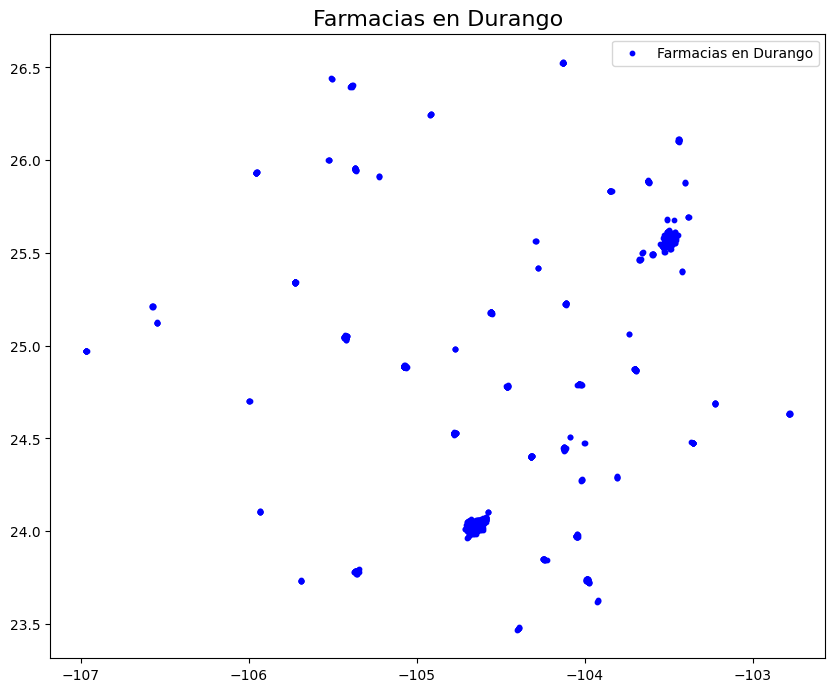

In [35]:
# Filtrar las farmacias que están en Durango (suponiendo que la columna 'entidad' contiene los nombres de los estados)
gdf_durango = gdf_salud[gdf_salud['entidad'] == 'Durango']

# Crear la figura y el eje para graficar
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar las farmacias de Durango, automaticamente maneja la columna geometry
gdf_durango.plot(ax=ax, color='blue', markersize=10, label='Farmacias en Durango')

# Añadir título y leyenda
ax.set_title('Farmacias en Durango', fontsize=16)
ax.legend()

# Mostrar el gráfico
plt.show()

Visualizamos entidad durango:

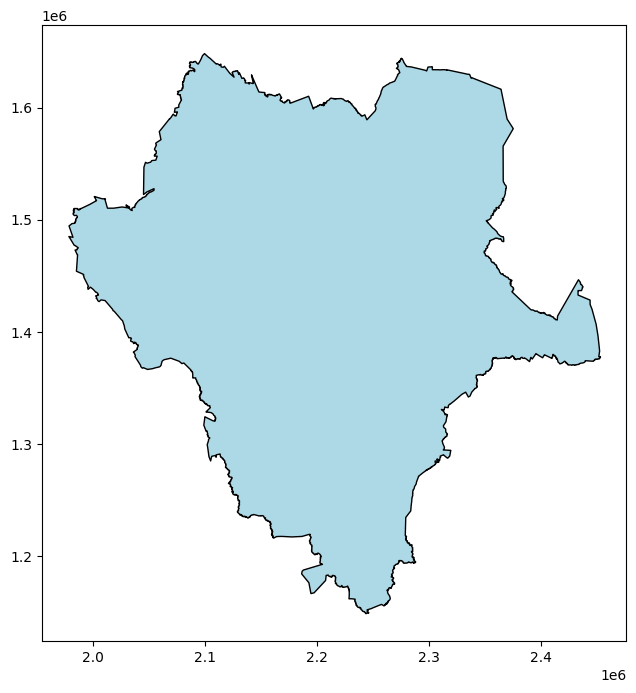

In [36]:
#Graficar un estado 
gdf_durango = gdf_mexico[gdf_mexico['NOMGEO'] == 'Durango']
fig, ax = plt.subplots(figsize=(8, 8))
gdf_durango.plot(ax=ax, color='lightblue', edgecolor='black')
plt.show()


Las unimos, pero ojo no funciona!

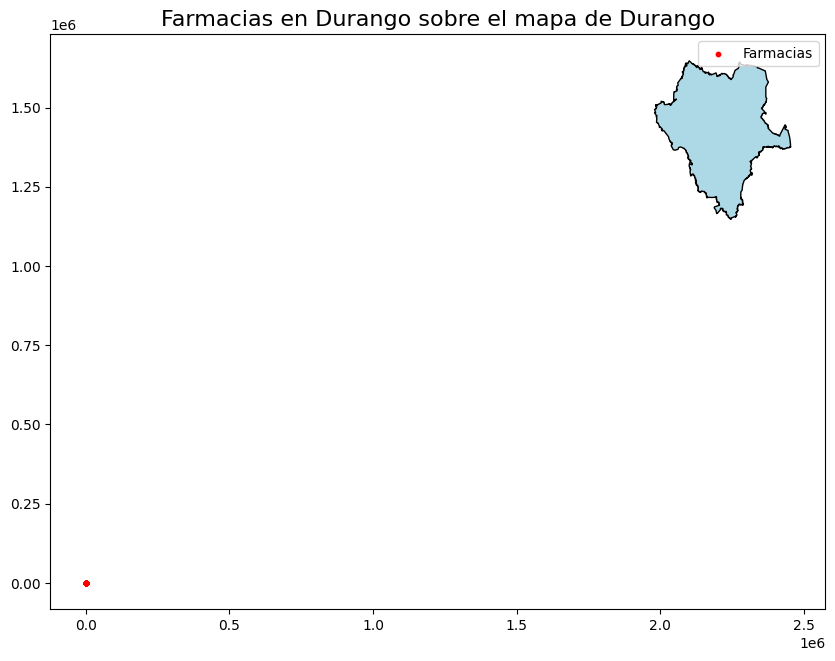

In [37]:
# Filtrar el estado de Durango
gdf_durango_estados = gdf_mexico[gdf_mexico['NOMGEO'] == 'Durango']

# Filtrar las farmacias que están en Durango
gdf_farmacias_durango = gdf_salud[gdf_salud['entidad'] == 'Durango']

# Crear la figura y el eje para graficar
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar los límites del estado de Durango (en gris claro)
gdf_durango_estados.plot(ax=ax, color='lightblue', edgecolor='black')

# Graficar las farmacias de Durango sobre el mapa (en rojo)
gdf_farmacias_durango.plot(ax=ax, color='red', markersize=10, label='Farmacias')

# Añadir título y leyenda
ax.set_title('Farmacias en Durango sobre el mapa de Durango', fontsize=16)
ax.legend()

# Mostrar el gráfico
plt.show()

Que paso? Que los shapefiles tienen distinto CRS, por lo tanto debemos transformar uno.

CRS de los estados de México: Utiliza un sistema de proyección llamado Lambert Conformal Conic (LCC), con coordenadas en metros.

CRS de las farmacias: Está en WGS 84 (latitud y longitud, grados)

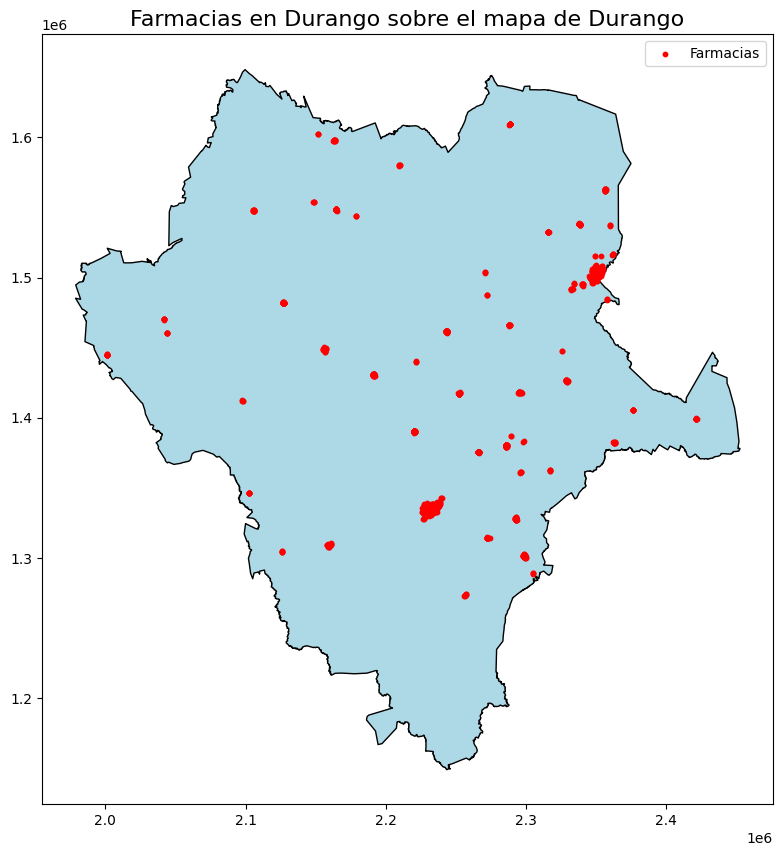

In [38]:
entidad = 'Durango'
# Si los CRS no coinciden, reproyectamos las farmacias para que tengan el mismo CRS que el de los estados
if gdf_mexico.crs != gdf_salud.crs:
    gdf_salud = gdf_salud.to_crs(gdf_mexico.crs)

# Filtrar el estado de Durango
gdf_entidad = gdf_mexico[gdf_mexico['NOMGEO'] == entidad]

# Filtrar las farmacias que están en Durango
gdf_farmacias_entidad = gdf_salud[gdf_salud['entidad'] == entidad]

# Crear la figura y el eje para graficar
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar los límites del estado de Durango (en gris claro)
gdf_entidad.plot(ax=ax, color='lightblue', edgecolor='black')

# Graficar las farmacias de Durango sobre el mapa (en rojo)
gdf_farmacias_entidad.plot(ax=ax, color='red', markersize=10, label='Farmacias')

# Añadir título y leyenda
ax.set_title('Farmacias en Durango sobre el mapa de Durango', fontsize=16)
ax.legend()

# Mostrar el gráfico
plt.show()



Puedes intentar otros estados, solo cambia nombre entidad

## Buffer

/usr/local/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


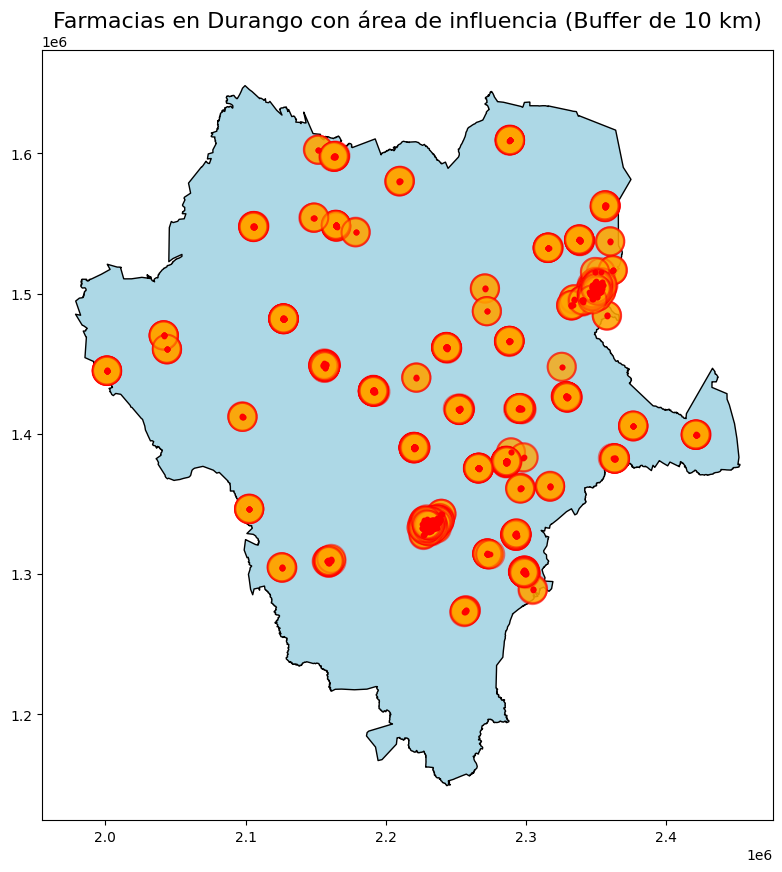

In [41]:
entidad = 'Durango'

# Si los CRS no coinciden, reproyectamos las farmacias para que tengan el mismo CRS que el de los estados
if gdf_mexico.crs != gdf_salud.crs:
    gdf_salud = gdf_salud.to_crs(gdf_mexico.crs)

# Filtrar el estado de Durango
gdf_entidad = gdf_mexico[gdf_mexico['NOMGEO'] == entidad]

# Filtrar las farmacias que están en Durango
gdf_farmacias_entidad = gdf_salud[gdf_salud['entidad'] == entidad]

# Crear un buffer de 5000 metros (5 km) alrededor de cada farmacia
gdf_farmacias_entidad['buffer'] = gdf_farmacias_entidad.geometry.buffer(10000)  # 5000 metros = 5 km

# Crear la figura y el eje para graficar
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar los límites del estado de Durango (en gris claro)
gdf_entidad.plot(ax=ax, color='lightblue', edgecolor='black')

# Graficar los buffers de las farmacias como círculos (en naranja, con borde)
gdf_farmacias_entidad['buffer'].plot(ax=ax, color='orange', edgecolor='red', alpha=0.5, linewidth=1.5, label='Área de influencia (Buffer 5 km)')

# Graficar las farmacias de Durango sobre el mapa (en rojo)
gdf_farmacias_entidad.plot(ax=ax, color='red', markersize=10, label='Farmacias')

# Añadir título y leyenda
ax.set_title('Farmacias en Durango con área de influencia (Buffer de 10 km)', fontsize=16)


# Mostrar el gráfico
plt.show()



## Mapa gradual de numero de farmacias por estado en mexico

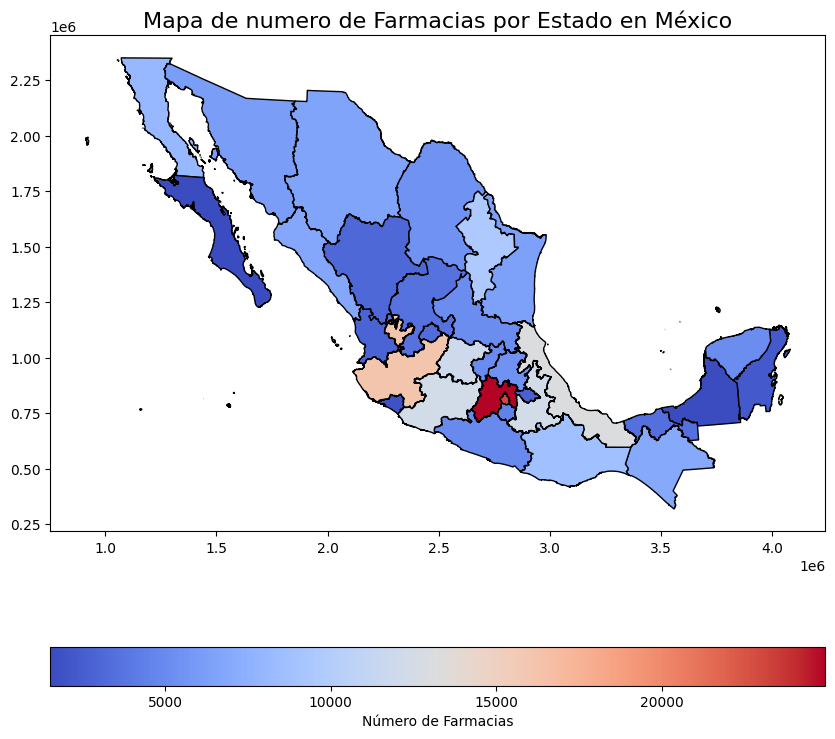

In [24]:
# Contar las farmacias por estado
farmacias_por_estado = gdf_salud.groupby('entidad').size()

# Asegurarse de que los estados en gdf_mexico y gdf_farmacias_entidad coincidan
gdf_mexico['farmacias_count'] = gdf_mexico['NOMGEO'].map(farmacias_por_estado).fillna(0)

# Crear la figura y el eje para graficar
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar el mapa de los estados, con color basado en la cantidad de farmacias
gdf_mexico.plot(ax=ax, column='farmacias_count', cmap='coolwarm', edgecolor='black', legend=True,
                legend_kwds={'label': "Número de Farmacias", 'orientation': "horizontal"})

# Graficar las farmacias sobre el mapa (en rojo, para resaltarlas)

# Añadir título y leyenda
ax.set_title('Mapa de numero de Farmacias por Estado en México', fontsize=16)

# Mostrar el gráfico
plt.show()

# Tarea